## This file contains:
1. **Loading `leader_df` CSV file that has leader info for each community**
2. **Running different BERT models trained on the SST-2 dataset to perform sentiment analysis**
3. **Storing each model's result graph and prediction dataset**


In [1]:
# !pip install tensorflow
# !pip install wordcloud
# !pip install pycountry
# !pip install langdetect
# !pip install prettytable

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
import itertools
from itertools import combinations
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from collections import Counter
import nltk
from nltk.corpus import stopwords, words as nltk_words
from nltk.tokenize import word_tokenize
# from wordcloud import WordCloud
import matplotlib.cm as cm
import re
from nltk.stem import WordNetLemmatizer
import heapq
from tqdm import tqdm

# import pycountry
# from langdetect import detect
# from prettytable import PrettyTable

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\21301610\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\21301610\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\21301610\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# LOAD DATA FILES AND COMBINE

In [4]:


#Temp lab
leader_df = pd.read_csv('C:/Users/21301610/Downloads/code/leader_df.csv')
# leader_df = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/15june thesis/leader_df.csv')


In [5]:
pip install transformers datasets torch


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pandas transformers


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

C:\Users\21301610\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\21301610\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\21301610\AppData\Roaming\Python\Python311\site-packages\h

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

          Username                                      Tweet Content  \
0  cryptosavingexp  "#ethereum price update: $1421.34 usd 0.073224...   
1    puritylekutit  "@janwues do not fear bear markets.they lead t...   
2          prymxpe  "@janwues do not fear bear markets.they lead t...   
3      garygensler  "@janwues do not fear bear markets.they lead t...   
4     minerstarmst  "@janwues do not fear bear markets.they lead t...   
5      you97953679  "@botarena_nft i respectfully believe that not...   
6          binance  "@botarena_nft i respectfully believe that not...   
7   cryptolottodao  "@botarena_nft i respectfully believe that not...   
8    Adnan25572221  "@betllerofficial i respectfully believe that ...   
9  "@airdropstario  "@betllerofficial i respectfully believe that ...   

       Sentiment  
0  Very Negative  
1       Positive  
2       Positive  
3       Positive  
4       Positive  
5  Very Negative  
6  Very Negative  
7  Very Negative  
8  Very Negative  
9  Ver

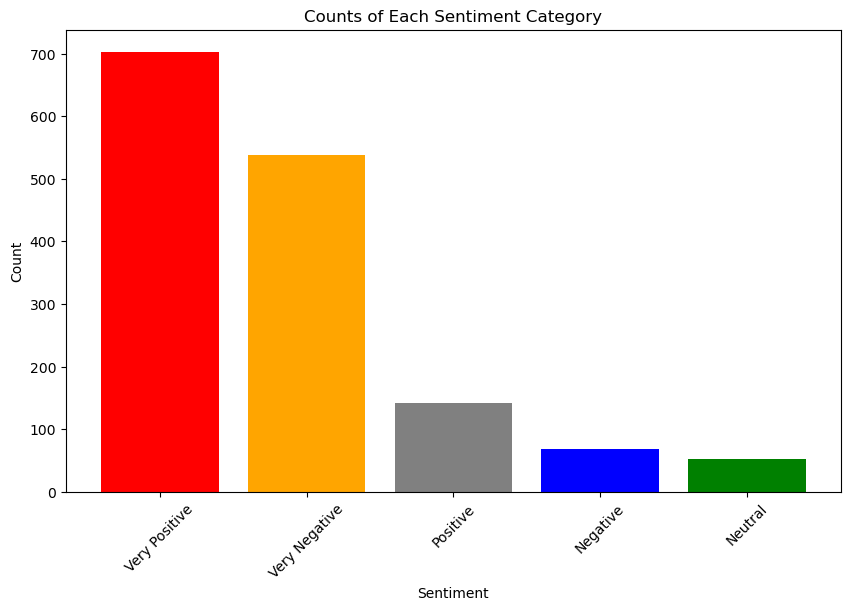

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load the pre-trained model and tokenizer for SST-5 sentiment analysis
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Define a function to map sentiment labels to categories
def map_sentiment(label):
    if label == '1 star':
        return 'Very Negative'
    elif label == '2 stars':
        return 'Negative'
    elif label == '3 stars':
        return 'Neutral'
    elif label == '4 stars':
        return 'Positive'
    elif label == '5 stars':
        return 'Very Positive'
    else:
        return 'Unknown'

# Apply the sentiment analysis model to the 'Tweet Content' column and map the labels
leader_df['Sentiment'] = leader_df['Tweet Content'].apply(lambda x: map_sentiment(sentiment_analysis(x)[0]['label']))

# Display the first 10 rows of the DataFrame
print(leader_df.head(10))

# Save the DataFrame to a CSV file
leader_df.to_csv('leader_sst5_sentiment.csv', index=False)

# Count the occurrences of each sentiment category
sentiment_counts = leader_df['Sentiment'].value_counts()

# Plot the counts of each sentiment category
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'orange', 'grey', 'blue', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Counts of Each Sentiment Category')
plt.xticks(rotation=45)
plt.show()
